In [2]:
# setting up the notebook 

%matplotlib inline
from pylab import *

# importing the class stored in the same directory as this file
import detectorgeometry as geom
import detectorgeometry_trap as geom_trap

# including command to reload the class in case it is modified
reload(geom)
reload(geom_trap)

<module 'detectorgeometry_trap' from 'detectorgeometry_trap.pyc'>

In [4]:
# example data input to class to determin effective area

theta_src = radians(83) #radians
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 1000000 # number of samples

# using the class
area = geom.Area(theta_src,h,R,theta_view, N)

print area.degree_eff_area()

186.73129730024434


In [ ]:
# check that the effective area calculated using Monte Carlo matches 
# the effective area integral

# writing necessary geometry functions
def rho_tau(t): # distance from observatory to Earth based on nadir angle
    rho = (2*(R+h)*np.cos(t) -  np.sqrt(4*((R+h)**2)*np.cos(t)**2 - 4*(2*R*h+h**2))) / 2
    return rho 

def rho_theta(t): # distance from observatory to Earth based on source angle
    rho = (2*R*np.cos(pi-t) +  np.sqrt(4*(R**2)*(np.cos(pi-t))**2 - 4*(-2*R*h-h**2))) / 2
    return rho 

def tau_theta(t): # nadir angle based on source angle
    tau = np.arcsin(R * np.sin(pi - t) / (R+h))
    return tau

def thetaE_tau(tau): # earth angle based on nadir angle
    earth_t = np.arcsin(rho_tau(tau) * np.sin(tau) / R)
    return earth_t

In [ ]:
# function evaluating integral for particular source theta
def integral_eff_area(phi_src,theta_src,h,R,theta_view):
        
    # this approximation of the integral is appropriate only for small source declinations
    rho = rho_theta(theta)
    A_1 = rho**2 * 2*pi*(1- np.cos(theta_view))
    
    # appropriate for all angles
    earth_t = thetaE_tau(theta)
    earth_t_min = thetaE_tau(theta - theta_view)
    arg = 4*((R+h)**2)*np.cos(theta + theta_view)**2 - 4*(2*R*h+h**2)
    if arg >=0:
        earth_t_max = thetaE_tau(theta + theta_view)
    elif arg < 0:
        earth_t_max = np.arccos(R/(R+h))
    earth_angle = 0.5 * (earth_t_max - earth_t_min)
            
    # this calculation of the integral chooses the incidence factor of the source angle
    # Earth angle where it intersects the observatory
    A_2 = R**2 * 2*pi * (1- np.cos(earth_angle)) * np.cos(earth_t+theta)
    
    # this calculation of the integral chooses the incidence factor of the 
    # effective area's unweighted average Earth angle 
    A_3 = R**2 * 2*pi * (1- np.cos(earth_angle)) * np.cos(0.5* (earth_t_min+earth_t_max)+theta)
    return A_2

In [ ]:
# Checking the class output with the calculations

start = 0 # minimum source declination in degrees
end = 9 # maximum source declination in degrees
steps=9 # divisions indeclination used to check class

phi_src = 0

for i in range(1,4):
    print "Acceptance Angle (degrees): ", i
    theta_view = radians(i)
    for j in range(0,steps):
        theta = radians(start+(end-start)*float(j)/steps)
        area = geom.Area(theta,h,R,theta_view, N)
        A_class = area.degree_eff_area()
        A_calc = integral_eff_area(phi_src,theta,h,R,theta_view)
        print "Source Theta: "+str(round(degrees(theta),3))+" MC: "+str(round(A_class,3))+" Calculated: "+str(round(A_calc,3))
    print "   "

0
1
2


KeyboardInterrupt: 

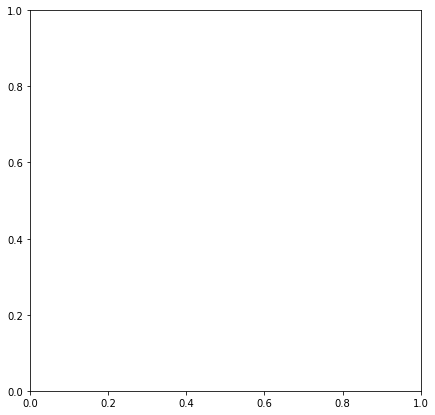

In [3]:
# Running the class for various acceptance angles and 
# source declinations to create a sensitivity plot
h = 3 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 100000000 # number of samples

# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
start = 0 # minimum source declination in degrees
end = 80 # maximum source declination in degrees
steps=160 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

sky_map = []
theta_view = radians(2)
for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
    area = geom.Area(theta,h,R,theta_view, N)
    A = area.degree_eff_area()
    sky_map.append(A)
    
start = 80 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=100 # divisions indeclination used to generate plot
x2 = np.linspace(-end,-start,steps)

for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
    area = geom.Area(theta,h,R,theta_view, N)
    A = area.degree_eff_area()
    sky_map.append(A)

x = x1+x2
    
ax.plot(x, sky_map)
sky_maps.append(sky_map)
    
    
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend([1],title=r'$\theta_{view}$', fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("BEACON Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

In [3]:
# DEMO TESTING DOT PRODUCT WEIGHT
# Running the class for various acceptance angles and 
# source declinations to create a sensitivity plot 
h = 3 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 50000000 # number of samples

# Creating a plot for the full range of possible source declinations 
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

sky_map = []
sky_map_nodot = []
theta_view = radians(2)
for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
    area = geom_trap.Area(theta,h,R,theta_view, N)
    A= area.event_retention()[0]
    sky_map.append(A)




0


detectorgeometry_trap.py:54: RuntimeWarning: invalid value encountered in double_scalars
  arg2 = (self.h * np.tan(theta_src)) /(4*np.pi*np.sin(earth_t)*self.R)


1


KeyboardInterrupt: 

[]

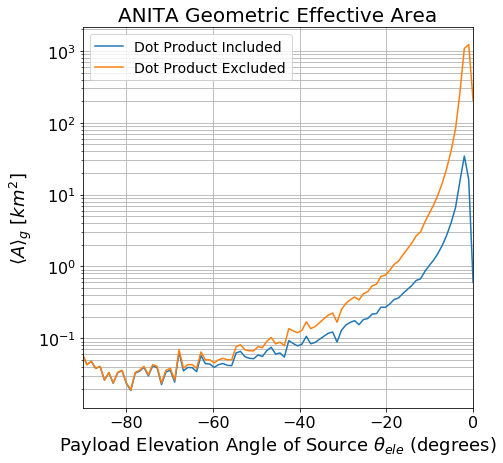

In [12]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()

ax.plot(x1, sky_map)
ax.plot(x1, sky_map_nodot)
    
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend(["Dot Product Included", "Dot Product Excluded"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("ANITA Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x1 = np.linspace(-90,-10,160)
x2 = np.linspace(-10,0,100)
x1 = np.append(x1, x2)
ax.plot(x1, sky_map)
sky_maps.append(sky_map)
    
    
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend([2],title=r'$\theta_{view}$', fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("BEACON Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

In [17]:
np.savetxt("geomtrap_effectivearea.csv", sky_map_trap, delimiter=",")

In [5]:
# Running the class for various acceptance angles and 
# source declinations to create a sensitivity plot


# Creating a plot for the full range of possible source declinations 

start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=100 # divisions indeclination used to generate plot
x = np.linspace(start, end, steps)
x2 = np.linspace(-end,-start,steps)
N = 50000000

sky_map = []
sky_map_trap = []
theta_view = radians(1)
for j in range(0,steps):
    print j
    theta = radians(start+(end-start)*float(j)/steps)
#     area = geom.Area(theta,h,R,theta_view, N)
#     A = area.degree_eff_area()
    area_trap = geom_trap.Area(theta, h, R, theta_view, N)
    A_trap = area_trap.event_retention()[0]
#     sky_map.append(A)
    sky_map_trap.append(A_trap)

    


0


detectorgeometry_trap.py:54: RuntimeWarning: invalid value encountered in double_scalars
  arg2 = (self.h * np.tan(theta_src)) /(4*np.pi*np.sin(earth_t)*self.R)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94


detectorgeometry_trap.py:35: RuntimeWarning: invalid value encountered in arcsin
  arg = np.arcsin((self.R+self.h) * np.sin(nadir) / self.R)


95
96
97
98
99


[]

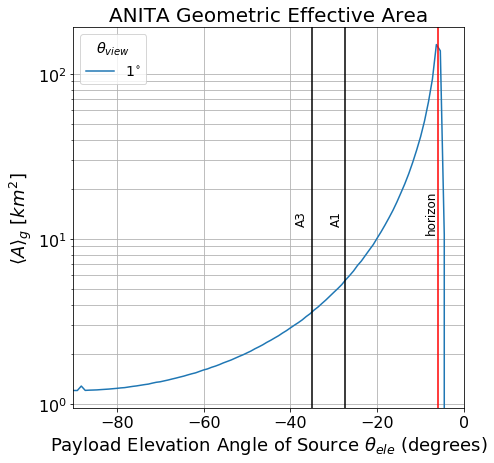

In [22]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()   
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
#ax.plot(x2, sky_map)
ax.plot(x2, sky_map_trap)

horizon = degrees(np.arcsin(R / (R+h)))-90
A1 = -27.4
A3 = -35
plt.text(-9,17.2,'horizon',rotation=90,fontsize=12)
plt.text(-31,13,'A1',rotation=90,fontsize=12)
plt.text(-39,13,'A3',rotation=90,fontsize=12)
plt.xlim(-90,0)  
legend = ax.legend([r'$1^{\circ}$'],title=r'$\theta_{view}$', fontsize=14)
#legend = ax.legend(['Full Cap','Trapezoid'],title=r'Integration Area', fontsize=14)
plt.axvline(x=horizon,color='r')
plt.axvline(x=A1,color='k')
plt.axvline(x=A3,color='k')
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("ANITA Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()

In [ ]:
# Creating a plot for source declinations near the horizon

fig = plt.figure()
ax = plt.axes()
start = 75 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=100 # divisions indeclination used to generate plot
x = np.linspace(start, end, steps)

for i in range(1,4):
    sky_map=[]
    theta_view = radians(i)
    for j in range(0,steps):
        theta = radians(start+(end-start)*float(j)/steps)
        area = geom.Area(theta,h,R,theta_view, N)
        A = area.degree_eff_area()
        sky_map.append(A)
    print i, max(sky_map)
    ax.plot(x, sky_map)

horizon = degrees(np.arcsin(R / (R+h)))
ax.legend([1, 2, 3])
plt.axvline(x=horizon,color='k')
plt.title("Near-Horizon Behavior")
plt.grid(True,which='both')
plt.semilogy()

In [ ]:
A = np.interp(np.linspace(-90,-1,10000),np.linspace(-90,-1,100),sky_map,0.0,0.0)
maxval = max(A)
A = A.tolist()
ind= A.index(maxval)
B = np.linspace(-90,-1,10000)
print B[ind]

In [ ]:
print max(sky_maps[0])
print 90*float(sky_maps[0].index(151.48987010056862))/100

In [ ]:
N_E=10000000

start = 0 # minimum source angle in degrees
end = 90 # maximum source angle in degrees
steps=90 # divisions in source angle used to generate plot



In [ ]:
N_E=10000000

start = 0 # minimum source angle in degrees
end = 90 # maximum source angle in degrees
steps=90 # divisions in source angle used to generate plot

labels =[]
fluxes=[]
for i in range(18,20):
    E = 10**float(i)
    flux=[]
    theta_view = radians(1)
    for j in range(0,steps):
        theta = radians(start+(end-start)*float(j)/steps)
        area = geom.Area(theta,h,R,theta_view, N_E)
        A = area.degree_eff_area()
        A = A*(100*1000)**2
        time = 30 * 24 * 3600 #seconds in a month
        F = 2.44/(np.log(10) * time * A * E)
        flux.append(F)
    fluxes.append(flux)
    label = r'$10^{'+str(i)+'}$ eV'
    labels.append(label)

In [ ]:
#creating a plot of flux limits based on energy
fig = plt.figure()
ax = plt.axes()

#x = np.linspace(end,start, steps)
x2 = ice_cube_elev
# x3 = icecube_fluxdec

# icecubeflux1 = F(10**(18),np.asarray(icecube1))
# print len(icecube1), len(icecubeflux1)
# icecubeflux2 = F(10**(19),np.asarray(icecube2))

#ax.plot(x, fluxes[0],color='m')
#ax.plot(x, fluxes[1],color='tab:purple')
# plt.scatter(x2,icecubeflux1)
# plt.scatter(x2,icecubeflux2)
# plt.scatter(x3,icecube_flux1)
# plt.scatter(x3,icecube_flux2)

plt.scatter(x2,icecube1)
plt.scatter(x2,icecube2)
    
#horizon = (90-degrees(np.arcsin(R / (R+h))))
#plt.text(2.5,10**(3),'horizon',rotation=90,fontsize=12)

ax.legend([r'$10^{18}$'+" eV",r'$10^{19}$'+" eV"],bbox_to_anchor=(0.7, 0.9))


# ax.legend(["ANITA "+r'$10^{18}$'+"eV, 1 month", "ANITA "+r'$10^{19}$'+"eV, 1 month",
#           "IceCube Point Sources "+r'$10^{18}$'+"eV, 6 years", "IceCube Point Sources "+r'$10^{19}$'+"eV, 6 years",
#            "IceCube Flux Sens. "+r'$10^{18}$'+"eV, 6 years", "IceCube Flux Sens. "+r'$10^{19}$'+"eV, 6 years"],bbox_to_anchor=(1, 1.05))
#plt.axvline(x=horizon,color='k')
plt.xlabel("Elevation "+r'$\theta_{ele}$'+" (degrees)", fontsize=14)
plt.ylabel (r'$A_{eff}(\theta_{ele})$'+" "+r' $[m^{2} ]$', fontsize=14)
#plt.ylabel(r'$F_{sens}(E)$'+" "+r' $[eV^{-1} cm^{-2} s^{-1}]$', fontsize=14)
plt.title("IceCube Point Source Effective Area", fontsize=16)
plt.xlim(-80,0)  
plt.text(-45,2*10**3,'Neutrino Energy',fontsize=12)

plt.grid(True)
plt.semilogy()
plt.ylim(2*10**(-4),10**(4))

In [ ]:
icecube_dec = [43.0,16.6,38.2,11.2,20.0,39.8,71.4,65.6,42.3,22.7,20.1,5.7]
ice_cube_elev = -np.asarray(icecube_dec)
icecube1 = [2*10^(-2),
             2*10,
             5*10**(-2),
             10**2,
             4,
             9*10**(-3),
             10**(-4),
             3.5*10**(-4),
             9*10**(-3),
             1.1,
             4,
             2*10**3]
icecube2 = [10**(-4),
              7*10**(-1),
              10**(-4),
              1.2*10,
              7*10**(-2),
              0,
              0,
              0,
              0,
              1.1*10**(-4),
              7*10**(-2),
              10**3]

# icecube1 = np.asarray(icecube1)*(6*365*24*3600)*100**2
# icecube2 = np.asarray(icecube2)*(6*365*24*3600)*100**2

icecube=[icecube1,icecube2]

In [ ]:
icecubefluxfactors =[7*10**(-13),
7.5*10**(-13),
8*10**(-13),
9*10**(-13),
10**(-12),
10**(-12),
1.1*10**(-12),
1.1*10**(-12),
1.2*10**(-12),
1.2*10**(-12),
1.3*10**(-12),
1.3*10**(-12),
1.5*10**(-12),
1.6*10**(-12),
1.7*10**(-12),
1.8*10**(-12),
1.9*10**(-12),
1.9*10**(-12),
2.1*10**(-12),
2.8*10**(-12),
3.2*10**(-12)]

icecube_sines=[0,
0.05,
0.1,
0.15,
0.2,
0.25,
0.3,
0.35,
0.4,
0.45,
0.5,
0.55,
0.6,
0.65,
0.7,
0.75,
0.8,
0.85,
0.9,
0.95,
1]

icecube_fluxdec=degrees(np.arcsin(np.asarray(icecube_sines)))
icecube_flux1=np.asarray(icecubefluxfactors)*((10**(18)*10**(-12))**(-2))*(10**(-12))
icecube_flux2=np.asarray(icecubefluxfactors)*((10**(19)*10**(-12))**(-2))*(10**(-12))
print icecube_fluxdec

In [ ]:
def F(E,timeA): #eV, seconds times cm^2
    F = 2.44/(np.log(10) * timeA * E)
    return F

In [ ]:
print F(0.6*10**(17),3.45*10**(10))
print F(0.6*10**(17),5.51*10**(9))